# Data Mining Assignment 1

## Student Details

Student Name and ID of the member submitting the assignment: 
Harshini Kandimalla (1001960046)

Student Name and ID of the remaining members: 
Pratik Antoni Patekar (1001937948), Pratik Dhanraj Chavan (1001963580)

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**5 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>

## Assignment Details

In this assignment, you will conduct a guided exploration over the given dataset.

You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python/Pandas, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python/Pandas, Weka, R
 
**Out of the 3 datasets listed below:**

**1. Weather dataset should be solved using Python in Jupyter notebook only.**

**2. Surgical dataset using WEKA**

**3. Healthcare_stroke_dataset using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

**Each code visualization and plotted graph needs to be explained in the 4 to 5 lines**

# Dataset Details

In this assignment, you will work on 1) 
weather_dataset.csv
The columns of the data-set are:

* Date
* Time
* Temp Humidity Index   
* Outside Temperature
* WindChill
* Hi Temperature
* Low Temperature
* Outside Humidity
* DewPoint
* WindSpeed
* Hi
* Wind Direction
* Rain
* Barometer
* Inside  Temperature
* Inside  Humidity
* ArchivePeriod

## Required Python Packages
You will only use the packages imported below in this assignment. 
<br>**Do NOT import any new packages without confirming with the TA.**
<br>20 points will be deducted from the assignment if any library is used except provided below.

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Dataset
The Python code below reads the weather dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [6]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('Weatherdataset.csv', encoding='latin1')

# Data pre processing steps

# Drop the rows or records with missing values
df_data = df_data.dropna(axis=0, how='any')
print(df_data.shape)

# Fix the data type for the columns required
df_data['Date'] = pd.to_datetime(df_data['Date'], errors ='coerce', format = '%d/%m/%Y') # Change date to datetime datatype
df_data['Time'] = df_data['Time'] + ':00' # Add seconds to Time columns and then
# Create a new field to store date and time together
df_data['DateTime'] = pd.to_datetime(df_data['Date'].astype(str) + ' ' + df_data['Time'].astype(str))
df_data['Time1'] = pd.to_timedelta(df_data['Time']) # Store time in timedelta format in for further required operation

#return the first 5 rows of the dataset
df_data.head(5)

(4463, 17)


,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod,DateTime,Time1
0,2006-05-31,09:00:00,9.3,9.3,9.3,9.7,9.1,55,0.8,1,7,NNW,0.0,1015.4,21.7,38,10,2006-05-31 09:00:00,0 days 09:00:00
1,2006-05-31,09:10:00,10.1,10.1,10.1,10.4,9.7,53,0.9,2,5,NE,0.0,1015.3,21.9,38,10,2006-05-31 09:10:00,0 days 09:10:00
2,2006-05-31,09:20:00,10.7,10.7,10.7,11.0,10.4,52,1.3,2,5,NE,0.0,1015.3,22.1,39,10,2006-05-31 09:20:00,0 days 09:20:00
3,2006-05-31,09:30:00,11.2,11.2,11.2,11.3,10.9,52,1.7,1,3,NNW,0.0,1015.2,22.2,38,10,2006-05-31 09:30:00,0 days 09:30:00
4,2006-05-31,09:40:00,11.4,11.4,11.4,11.6,11.3,51,1.7,2,6,E,0.0,1015.2,22.3,38,10,2006-05-31 09:40:00,0 days 09:40:00


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 1 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print ("Task 1-a: Details of df_data data frame are: \n")
print("Details about df_data dataframe: ")
print(df_data.info())  # Using .info() to print the information about the dataframe

# 1 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
print ("\nTask 1-b: Number of rows and number of columns:") 
# Used .shape() function to return the number of columns and rows
print("No. of rows:", df_data.shape[0])
print("No. of columns:", df_data.shape[1])

# 1 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Wind Direction' column of the df_data 
print ("\nTask 1-c: Descriptive details of 'Wind Direction' column are\n")
wind_dir = df_data["Wind Direction"]
print("Values in Wind Direction column:", wind_dir.values)  # .value returns the numpy array with dataframe values
print("Count of Wind Direction column:", wind_dir.shape[0]) # print the size of the column
print("Top value in Wind Direction column:", wind_dir[0])   # print the top/ first value in the column
print("Bottom value in Wind Direction column:", wind_dir.iloc[-1])  # print the last/ bottom value in the column
unique_wind_dir = wind_dir.drop_duplicates()  # .drop_duplicates() remove the duplicate values from the column
print("Unique values of Wind Direction column:", unique_wind_dir.values)  # print all unique values
print("Count of unique values of Wind Direction column:", unique_wind_dir.shape[0])  # print the count of unique values

# 1 points
#Task 1-d: Print the average Outside Temperature for each day
print("\nTask 1-d: The average outside temp for each day:")
# Used .groupby() and mean() function to find the average temp
print(df_data.groupby('Date').mean()['Outside Temperature'])

# 1 points
#Task 1-e: Print the average Outside Temperature for each week
print("\nTask 1-e: The average outside temp for each week:")
# datetime_object.dt.week returns the week number for that date
df_data['Week'] = df_data['Date'].dt.week
# Using groupby with mean function to calculate the average temp over week
print(df_data.groupby('Week').mean()['Outside Temperature'])
df_data = df_data.drop('Week', 1)

# 1 points
#Task 1-f: What is the maximum Outside Temperature difference each day for all the days of the months?
print("\nTask 1-f: Maximum temperature difference each day for all the days of the months:")
# Maximum temperature difference = max temperature for xth day - min temperature for xth day
# Calculated using above formula
print(df_data.groupby('Date').max()['Outside Temperature'] - df_data.groupby('Date').min()['Outside Temperature'])

# 1 points
# Task 1-h: What is the minium Outside Temperature difference each day for all the days of the months?
# To calculate the minimum difference between any two temperatures of the day calculate all the possible differences
# between the temperatures and find the minimum from them for each day
# Here all values are zero because one temperature is repeated atleast twice per day thus resulting in minimum temp diff
# as zero 0 for all days
print("\nTask 1-h: Minium temperature difference each day for all the days of the months:")
df_data1 = df_data.sort_values(by = ['Date','Outside Temperature'])
df_data1['MinTempDiff'] = df_data1.groupby('Date')['Outside Temperature'].diff()
df_data1 = df_data1[df_data1['MinTempDiff'] != 0]

print(df_data1[df_data1.MinTempDiff==df_data1.MinTempDiff.min()][['Date', 'MinTempDiff']].groupby('Date').min())
df_data1 = df_data1.drop('MinTempDiff', 1)

#Task 1-i: Display all the unique values for each column.
print("\nTask 1-i: The unique values for each column are:")
# Used .columns to get the name of the columns and .drop duplicates to get the unique values
for i in range(df_data.shape[1]):
    print("\nUnique values of column " + df_data.columns[i] + " are as follows:", df_data[df_data.columns[i]].drop_duplicates().values)
# printing the unique values for each column using for loop

Task 1-a: Details of df_data data frame are: 

Details about df_data dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Date                    4463 non-null   datetime64[ns] 
 1   Time                    4463 non-null   object         
 2   Temp Humidity Index     4463 non-null   float64        
 3   Outside Temperature     4463 non-null   float64        
 4   WindChill               4463 non-null   float64        
 5   Hi Temperature          4463 non-null   float64        
 6   Low Temperature         4463 non-null   float64        
 7   Outside Humidity        4463 non-null   int64          
 8   DewPoint                4463 non-null   float64        
 9   WindSpeed               4463 non-null   int64          
 10  Hi                      4463 non-null   int64          
 11  Wind Direction

C:\Users\patek\AppData\Local\Temp/ipykernel_42648/1329448551.py:39: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_data['Week'] = df_data['Date'].dt.week
C:\Users\patek\AppData\Local\Temp/ipykernel_42648/1329448551.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_data = df_data.drop('Week', 1)
C:\Users\patek\AppData\Local\Temp/ipykernel_42648/1329448551.py:63: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_data1 = df_data1.drop('MinTempDiff', 1)


# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [6]:
# 20 points
# Task 2-A: Generate a Outside_Temperature.txt file containing the answers to the following questions: 
# Using the “Outside Temperature” values: 
# a. What is the average time of hottest daily temperature (over month); 
# b. What time of the day is the most commonly occurring hottest time; 
# c. Which are the Top Ten hottest times on distinct days, preferably sorted by date order.
print("\n\n###########################Start of Task 2-A#############################")
print("Part a: What is the average time of hottest daily temperature (over month)")
# Get the required fields
df_data1 = df_data[['Date', 'Time1', 'Outside Temperature']]
# Get the maximum temperatures for every day with corresponding time and temperature
out1 = df_data1[df_data1['Outside Temperature']==df_data1.groupby('Date')['Outside Temperature'].transform('max')]
# Add Month field
out1['Month'] = pd.DatetimeIndex(out1['Date']).month
# Print the average time of the hottest daily temperature
out2 = out1.groupby(['Date','Outside Temperature'])['Time1'].mean().reset_index()
print("\nPrinting the average time of hottest daily temperature:")
print(out2)
# Print the average time of the hottest daily temperature over month
print("\nPrinting the average time of hotttest daily temperature over month:")
x1 = out1[['Month', 'Time1']].groupby(['Month']).mean()
print(x1)

print("\nPart b: What time of the day is the most commonly occurring hottest time")
# Print the most frequent hottest time from the previous max temperature dataframe
# Mode function gives the elements with the maximum frequency
x2 = out2['Time1'].mode()
print(x2)

print("\nPart c: Which are the Top Ten hottest times on distinct days, preferably sorted by date order")
# Arrange dataframe in descending order of Outside temperature and then sort in ascending order as per Date
# And them print the top ten rows to get the required data
x = out2.sort_values(by=['Outside Temperature'], ascending=False).head(10)
x3 = x.sort_values(by=['Date'], ascending = True)
print(x3)

# Write all data in the Outside_Temperature.txt file
try:
    print("\nWriting above data into Outside_Temperature.txt file")
    tfile = open('Outside_Temperature.txt', 'w')
    tfile.write("Part a: What is the average time of hottest daily temperature (over month)\n")
    tfile.write(x1.to_string())
    tfile.write("\n")
    tfile.write("\n")
    tfile.write("Part b: What time of the day is the most commonly occurring hottest time\n")
    tfile.write(x2.to_string())
    tfile.write("\n")
    tfile.write("\n")
    tfile.write("Part c: Which are the Top Ten hottest times on distinct days, preferably sorted by date order\n")
    tfile.write(x3.to_string())
    tfile.close()
    print("...\nCompleted writing to Outside_Temperature.txt file.")
except:
    print("ERROR: Could not open the file Outside_Temperature.txt.")

print("\n###########################End of Task 2-A#############################")


# 20 points
#Task 2-B: Using the ‘Hi Temperature’ values produce a “Hi_Temperature.txt” file containing all of the Dates and Times
# where the “Hi Temperature” was within +/- 1 degree of 22.3 or 
# the “Low Temperature” was within +/- 0.2 degree higher or lower of 10.3 over the first 9 days of June
print("\n\n###########################Start of Task 2-B###########################")
df_data2 = df_data[['Date', 'Time', 'Hi Temperature', 'Low Temperature']]  # get the required fields
# Add month and date fields for filtering
df_data2['Month'] = pd.DatetimeIndex(df_data2['Date']).month  
df_data2['Date1'] = pd.DatetimeIndex(df_data2['Date']).day

# Create filters for filtering as per given conditions
mask1 = df_data2['Hi Temperature'] >= 21.3
mask2 = df_data2['Hi Temperature'] <= 23.3
mask3 = df_data2['Low Temperature'] >= 10.1
mask4 = df_data2['Low Temperature'] <= 10.5
mask5 = df_data2['Date1'] >= 1
mask6 = df_data2['Date1'] <= 9
mask7 = df_data2['Month'] == 6

# Apply the filters to dataframe and drop the columns that were added for creating masks/ filters
out2 = df_data2[(mask1 & mask2) | (mask3 & mask4 & mask5 & mask6 & mask7)]
out2 = out2.drop('Date1', axis = 1)
out2 = out2.drop('Month', axis = 1)

# Print the output dataframe and write in the text file
print("\nPrinting the output:")
print(out2)
#np.savetxt('output.txt', out2.values, delimiter="\t", header="X\tY\tZ\tValue") 
try:
    print("\nWriting above data into output.txt file")
    tfile = open('output.txt', 'w')
    tfile.write(out2.to_string())
    tfile.close()
    print("...\nCompleted writing to output.txt file.")
except:
    print("ERROR: Could not open the file output.txt.")
print("\n###########################End of Task 2-B###########################")




###########################Start of Task 2-A#############################
Part a: What is the average time of hottest daily temperature (over month)

Printing the average time of hottest daily temperature:
         Date  Outside Temperature           Time1
0  2006-05-31                 15.5 0 days 14:40:00
1  2006-06-01                 17.2 0 days 15:05:00
2  2006-06-02                 17.7 0 days 13:20:00
3  2006-06-03                 19.6 0 days 14:55:00
4  2006-06-04                 18.0 0 days 16:15:00
5  2006-06-05                 16.1 0 days 14:05:00
6  2006-06-06                 23.2 0 days 14:20:00
7  2006-06-07                 19.6 0 days 13:00:00
8  2006-06-08                 20.7 0 days 16:35:00
9  2006-06-09                 17.9 0 days 14:40:00
10 2006-06-10                 19.9 0 days 13:05:00
11 2006-06-11                 22.4 0 days 11:10:00
12 2006-06-12                 19.4 0 days 15:00:00
13 2006-06-13                 17.1 0 days 13:40:00
14 2006-06-14              

C:\Users\patek\AppData\Local\Temp/ipykernel_42648/3425310214.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out1['Month'] = pd.DatetimeIndex(out1['Date']).month
C:\Users\patek\AppData\Local\Temp/ipykernel_42648/3425310214.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data2['Month'] = pd.DatetimeIndex(df_data2['Date']).month
C:\Users\patek\AppData\Local\Temp/ipykernel_42648/3425310214.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

C:\Users\patek\AppData\Local\Temp/ipykernel_42648/2896690047.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4['Month'] = pd.DatetimeIndex(df_data4['DateTime']).month


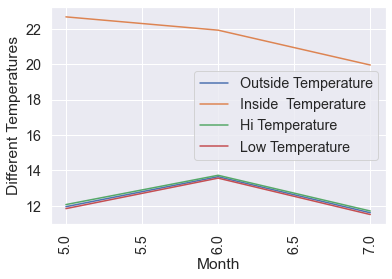

C:\Users\patek\AppData\Local\Temp/ipykernel_42648/2896690047.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data3['Date1'] = pd.DatetimeIndex(df_data3['Date']).day
C:\Users\patek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


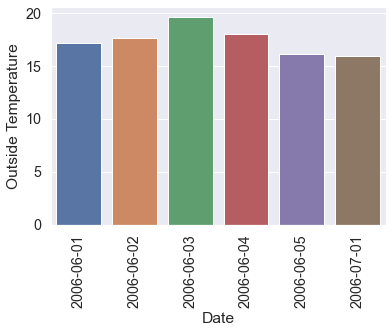

In [51]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.3)

# 5 points
# Task 3-a: Visulalize the temperature for each month  
# Think of a way to nicely visualize all the temperature and provide detailed explaination 
#########################begin code for Task 3-a
# Create a lineplot for the outside temperature versus date
fig, ax = plt.subplots()
df_data4 = df_data[['DateTime', 'Outside Temperature', 'Inside  Temperature', 'Hi Temperature', 'Low Temperature']]
df_data4['Month'] = pd.DatetimeIndex(df_data4['DateTime']).month
df_data4 = df_data4[['Month', 'Outside Temperature', 'Inside  Temperature', 'Hi Temperature', 'Low Temperature']].groupby('Month').mean().reset_index()
# Plot all the 4 temperatures in the dataset
ax = sns.lineplot(data=df_data4, x = "Month", y = "Outside Temperature")
ax1 = sns.lineplot(data=df_data4, x = "Month", y = "Inside  Temperature")
ax2 = sns.lineplot(data=df_data4, x = "Month", y = "Hi Temperature")
ax3 = sns.lineplot(data=df_data4, x = "Month", y = "Low Temperature")
plt.legend(labels=["Outside Temperature","Inside  Temperature", "Hi Temperature", "Low Temperature"])
plt.xticks(rotation=90)
plt.ylabel("Different Temperatures")
plt.show()

#########################end code for Task 3-a

# 15 points
# Task 3-b: Display the time period on a bar plot which has highest temperature for the first 5 days of every month
# provide detailed explaination 
#########################begin code for Task 3-b 
# Get the required fields
df_data3 = df_data[['Date', 'Time', 'Hi Temperature', 'Low Temperature', 'Outside Temperature']]
df_data3['Date1'] = pd.DatetimeIndex(df_data3['Date']).day
# Filter data for the dates = 1, 2, 3, 4, 5
mask1 = df_data3['Date1'] >= 1
mask2 = df_data3['Date1'] <= 5
# Apply filter
df_data3_after = df_data3[mask1 & mask2]
df_data3_after = df_data3_after[['Date', 'Outside Temperature']]
df_data3_after = df_data3_after.groupby(['Date']).max().reset_index()
df_data3_after['Date'] = df_data3_after['Date'].astype(str)
# Plot the bar graph
sns.barplot(df_data3_after['Date'], df_data3_after['Outside Temperature'])
plt.xticks(rotation=90)
plt.show()

#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create two visualization for it and explain in a 4 to 5 lines your valid reasoning. Do not copy paste from another team.
This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

# Explanation for task 4 observations: 
In the plots below, we can see that the columns of Temp. humidity index, Outside Temperature, Windchill, High Temperature, Low Temperature all share a plot with a positive slope. From this we can understand that these fields are highly correlated to each other. Other than that we can even see that the columns WindSpeed and Hi are highly (positive) correlated to each other as well.

One thing to note over here about Outside Humidity is that, we can see it is somewhat negatively correlated to the Outside Temperature field. And similar deductions can be made for the other fields as well.

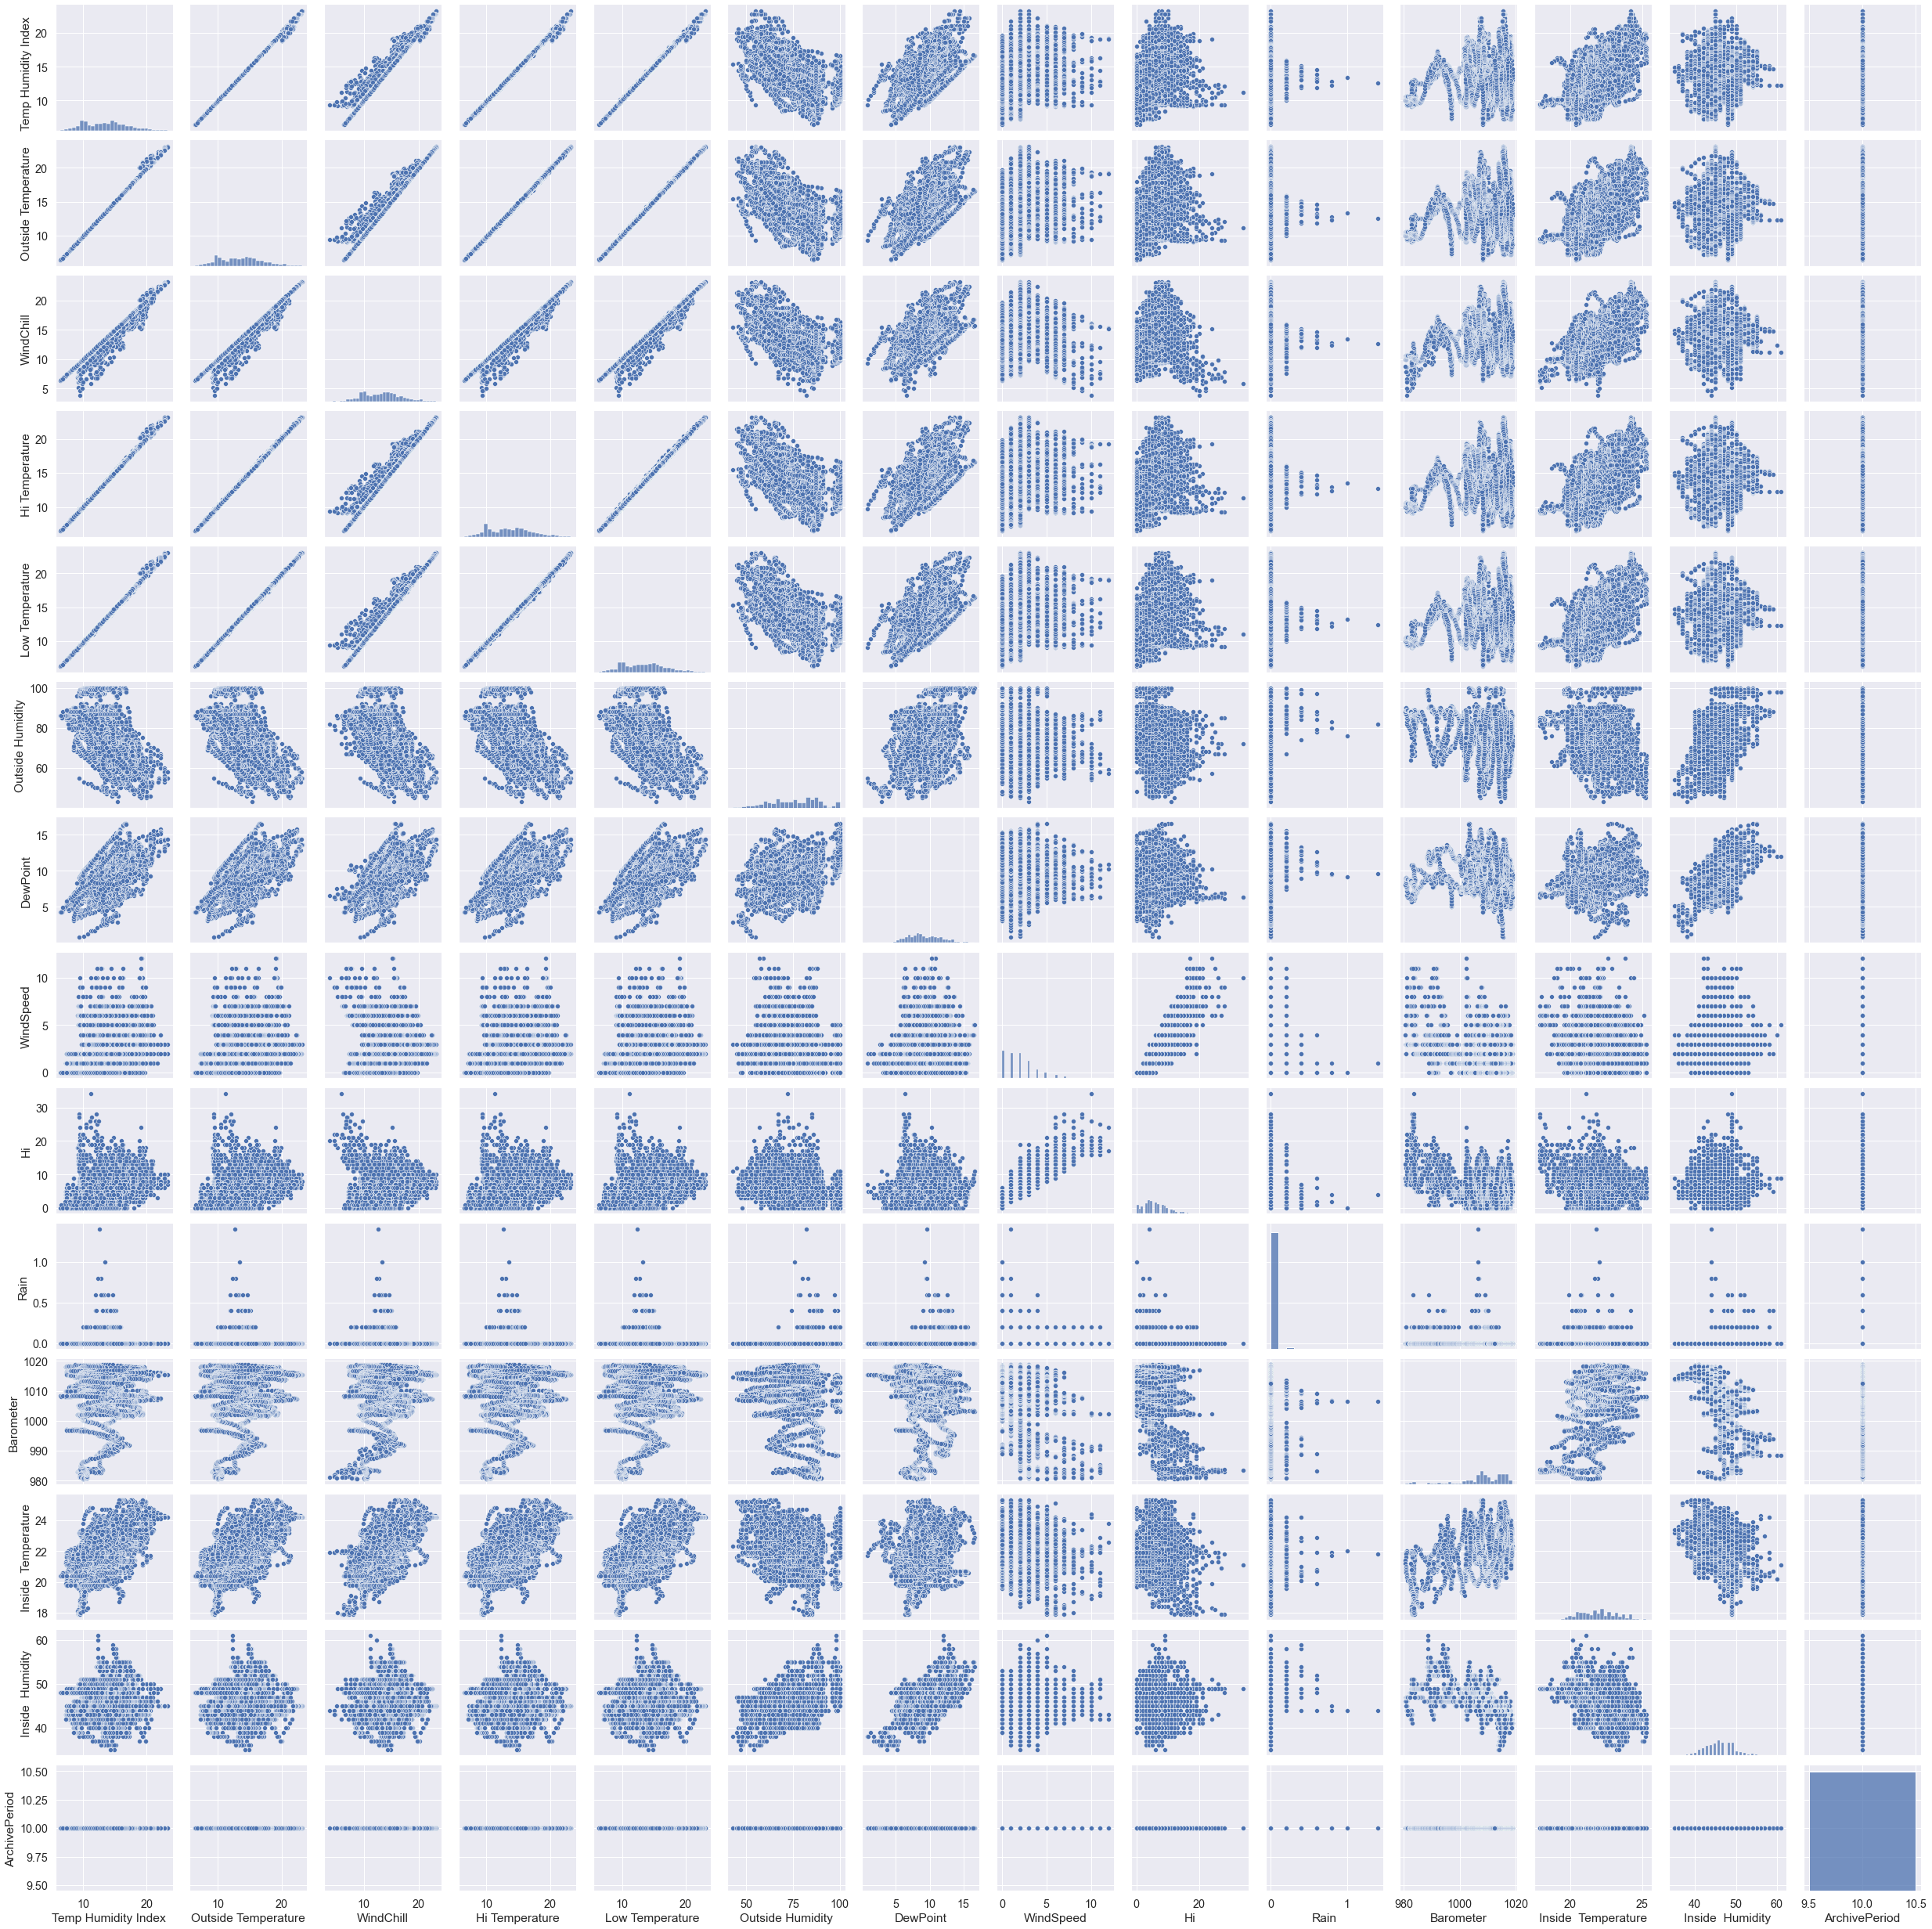

In [52]:
#########################begin code for Task 4
df_data4 = df_data
sns.pairplot(df_data4)
#########################end code for Task 4

The same relationships can be deduced from the heatmap plots as well. Heat map shows the values of correlation coefficients calculated for each pair of fields on scale of 0 to 1. The value -1 of correlation coefficient means the correlation between both columns is very high and negative and value of 1 means the correlation is very high and positive. Whereas the value of 0 means that the fields are not correlated at all.

Observation: The Outside Humidity has a negative correlation coefficient of -0.63 against Outside temperature.

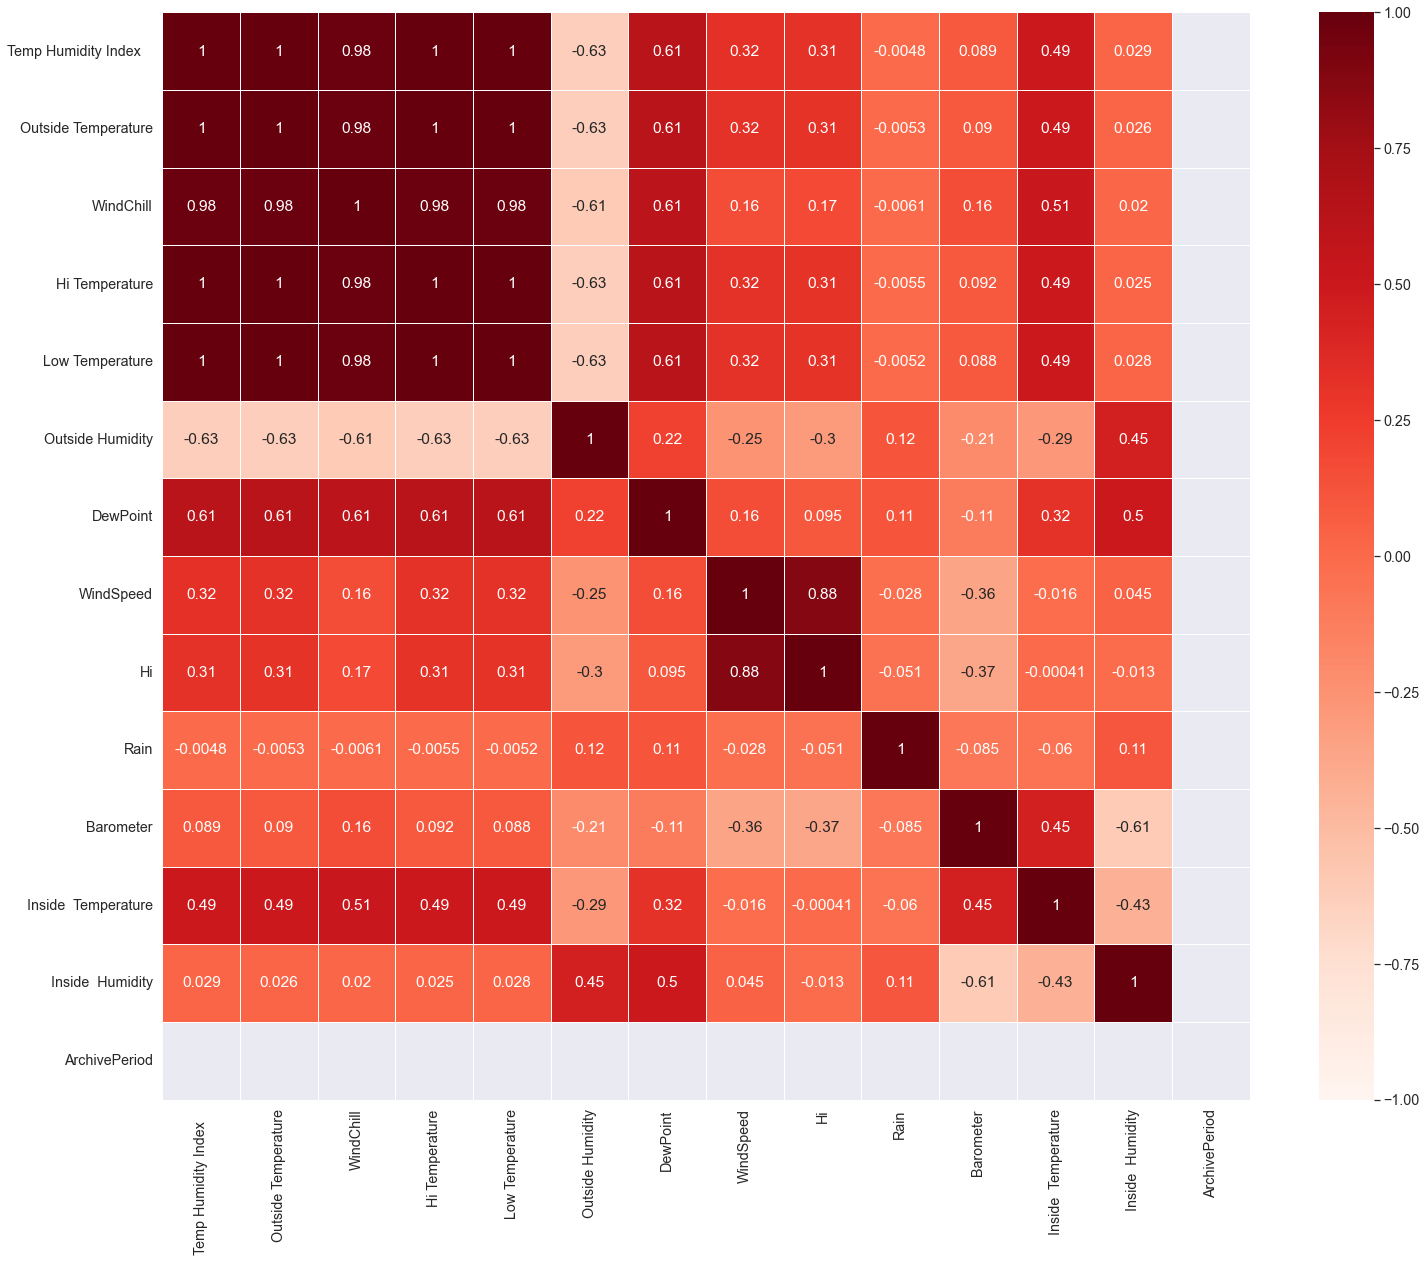

In [145]:
corr = df_data.corr()
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, linewidths=0.5, annot = True, square = True, vmax = 1, vmin = -1, cmap='Reds')
plt.show()

A further detailed relation between outside humidity and temperature can be shown as follows. From the plots below, we can see that the average Outside temperature decreases over the month of June to July whereas on the other hand, the Outside Humidity increases. 

And we know that this is true because if the Outside temperature is high, it causes more evaporation of moisture from air and thus reducing Outside Humidity and the if the Outside Temperature is low then Outside Humidity will be high.

C:\Users\patek\AppData\Local\Temp/ipykernel_42648/828976263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Month'] = pd.DatetimeIndex(y['DateTime']).month


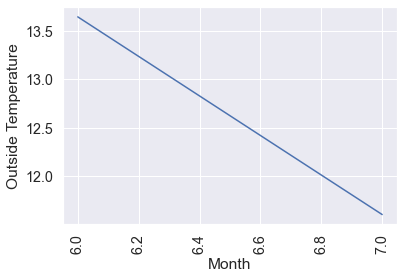

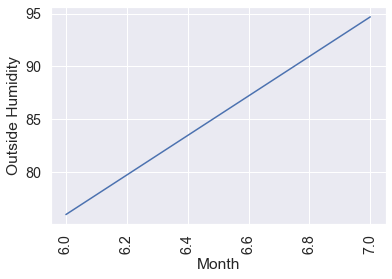

In [50]:
y = df_data[['DateTime','Outside Temperature', 'Outside Humidity']]
y['Month'] = pd.DatetimeIndex(y['DateTime']).month
y = y.groupby('Month').mean().reset_index()
y = y[y['Month'] != 5]
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.3)
fig, ax = plt.subplots()

ax1 = sns.lineplot(data=y, x = "Month", y = "Outside Temperature")
plt.xticks(rotation=90)
plt.ylabel("Outside Temperature")
plt.show()

ax2 = sns.lineplot(data=y, x = "Month", y = "Outside Humidity")
plt.xticks(rotation=90)
plt.ylabel("Outside Humidity")
plt.show()


## Report for Python
Report Explanation

You will prepare a **report** in pdf file explainaing the answer for task 2, 3 and 4<br>

Note: the more detailed explanation the better

## Rubricks

Task 1: 8 points<br>
Task 2: 40 points<br>
Task 3: 20 points<br>
Task 4: 20 points<br>
Report : 12 points<br>
------------------------------------
Total : 100 points<br>